# TASK 1- PREDICTION OF STOCK PRICE USING LSTM 

In [1]:
# Description- This data talks about stock prices of google of certain period of time from 2012 to 2016

In [2]:
# import the necessary libraries-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#loading the dataset
df=pd.read_csv("stock_price.csv")
df

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"6,23,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"7,89,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"11,53,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"7,44,300"


In [4]:
# to check description of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [5]:
# to check statistical description
df.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [6]:
# to see first 5 rows
df.head()

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"


In [7]:
# to see maximum volume
df['Volume'].max()

'97,06,300'

In [8]:
df['Volume'].min()

'1,00,12,700'

In [9]:
# to check null values
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [10]:
# As we don't have null values so we need not to do any data engineering part and encoding part as 
#we have numerical values to predict the pricr

# Training on Open price column

In [11]:
#Now to use open price column for training-
train_df = df.iloc[:,1:2].values
train_df


array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [12]:
train_df.shape

(1258, 1)

# Normalization

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_train_df=scaler.fit_transform(train_df)

In [14]:
scaled_train_df

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [15]:
#creating X_train and y_train
x_train=[]
y_train=[]
for j in range(60,1258):
    x_train.append(scaled_train_df[j-60:j,0])
    y_train.append(scaled_train_df[j,0])
x_train=np.array(x_train) 
y_train=np.array(y_train)  

In [16]:
# to see their shape
x_train.shape,y_train.shape

((1198, 60), (1198,))

In [17]:
# To reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [18]:
x_train.shape

(1198, 60, 1)

# Model Building with LSTM

In [19]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [20]:
reg=Sequential()
reg.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
reg.add(Dropout(0.2))
reg.add(LSTM(units=50,return_sequences=True))
reg.add(Dropout(0.2))
reg.add(LSTM(units=50,return_sequences=True))
reg.add(Dropout(0.2))
reg.add(LSTM(units=50))
reg.add(Dropout(0.2))
reg.add(Dense(units=1))

# Model Fitting

In [21]:
reg.compile(optimizer='adam',loss='mean_squared_error')
reg.fit(x_train,y_train,epochs=50,batch_size=30)

Epoch 1/50
40/40 [==============================] - 23s 194ms/step - loss: 0.0428
Epoch 2/50
40/40 [==============================] - 8s 195ms/step - loss: 0.0065
Epoch 3/50
40/40 [==============================] - 8s 196ms/step - loss: 0.0059
Epoch 4/50
40/40 [==============================] - 7s 182ms/step - loss: 0.0061
Epoch 5/50
40/40 [==============================] - 8s 198ms/step - loss: 0.0064
Epoch 6/50
40/40 [==============================] - 8s 199ms/step - loss: 0.0048
Epoch 7/50
40/40 [==============================] - 8s 196ms/step - loss: 0.0050
Epoch 8/50
40/40 [==============================] - 8s 195ms/step - loss: 0.0052
Epoch 9/50
40/40 [==============================] - 8s 197ms/step - loss: 0.0049
Epoch 10/50
40/40 [==============================] - 7s 187ms/step - loss: 0.0043
Epoch 11/50
40/40 [==============================] - 8s 194ms/step - loss: 0.0045
Epoch 12/50
40/40 [==============================] - 8s 190ms/step - loss: 0.0042
Epoch 13/50
40/40 [=====

In [31]:
#extracting actual stock prices as test data
df_test=pd.read_csv("Stock_Price_Test.csv")
ac_stock=df_test.iloc[:,1:2].values

In [32]:
df_total=pd.concat((df['Open'],df_test['Open']),axis=0)
inputs=df_total[len(df_total)-len(df_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)
x_test=[]
for j in range(60,80):
    x_test.append(inputs[j-60:j,0])
x_test=np.array(x_test)    
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
    






In [33]:
predicted=reg.predict(x_test)
predicted=scaler.inverse_transform(predicted)

1/1 [==============================] - 4s 4s/step


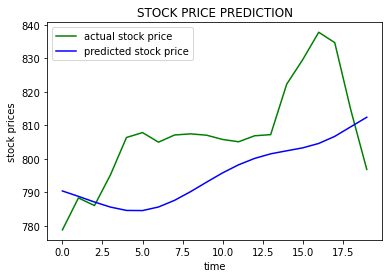

In [35]:
#plotting actual vs predicted prices
plt.plot(ac_stock,color='green',label='actual stock price')
plt.plot(predicted,color='blue',label='predicted stock price')
plt.title("STOCK PRICE PREDICTION")
plt.xlabel("time")
plt.ylabel("stock prices")
plt.legend()
plt.show()

In [ ]:
# Here, we can clearly sees that the predicted price are little bit close to actual ones